In [ ]:
library(dplyr) # 用于数据变换、数据清理
library(caret) # 用于机器学习建模
library(ggplot2) # 用于绘图
library(stringr) # 用于字符串数据处理

In [1]:
# make a new dataframe
fcol1 <- c("id1", "id2", "id3")
fcol2 <- c(1, 2, 3)
data2 = data.frame(fcol1, fcol2)
data2
# Assign empty value to an element in a data frame
# data2[2,2] <- NULL (cannot do that)
data2[2,2] <- NA
data2
# Assign NULL to a list
fcol1
fcol1 <- NULL
fcol1

fcol1,fcol2
id1,1
id2,2
id3,3


fcol1,fcol2
id1,1
id2,NA
id3,3


[1] "id1" "id2" "id3"

NULL

In [20]:
# read data from a file
data1 <- readr::read_csv("sample.csv")
data1

Parsed with column specification:
cols(
  Col1 = col_character(),
  Col2 = col_character(),
  Col3 = col_double(),
  Col4 = col_double(),
  Col5 = col_double(),
  Col6 = col_double(),
  Col7 = col_double(),
  Label = col_character()
)


Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id1,aa,1,0.6,2,-2,1.3,lb1
id2,bb,2,NA,4,-4,2.8,lb2
id3,cc,3,0.4,6,-6,-3.5,lb2
id4,aa,4,12.0,8,-8,4.4,lb1
id5,cc,5,0.7,10,-10,9.9,lb2
id5,cc,5,0.7,10,-10,9.9,lb2
id6,dd,6,0.5,12,-12,-1.9,lb2
id7,bb,7,-2.0,14,-14,0.0,lb2


In [3]:
# EDA
summary(data1)

# Set column types
data1$Col2 <- as.factor(data1$Col2)
data1$Label <- as.factor(data1$Label)
summary(data1)

     Col1               Col2                Col3            Col4       
 Length:8           Length:8           Min.   :1.000   Min.   :-2.000  
 Class :character   Class :character   1st Qu.:2.750   1st Qu.: 0.450  
 Mode  :character   Mode  :character   Median :4.500   Median : 0.600  
                                       Mean   :4.125   Mean   : 1.843  
                                       3rd Qu.:5.250   3rd Qu.: 0.700  
                                       Max.   :7.000   Max.   :12.000  
                                                       NA's   :1       
      Col5            Col6             Col7           Label          
 Min.   : 2.00   Min.   :-14.00   Min.   :-3.500   Length:8          
 1st Qu.: 5.50   1st Qu.:-10.50   1st Qu.:-0.475   Class :character  
 Median : 9.00   Median : -9.00   Median : 2.050   Mode  :character  
 Mean   : 8.25   Mean   : -8.25   Mean   : 2.862                     
 3rd Qu.:10.50   3rd Qu.: -5.50   3rd Qu.: 5.775                     
 Max

     Col1           Col2        Col3            Col4             Col5      
 Length:8           aa:2   Min.   :1.000   Min.   :-2.000   Min.   : 2.00  
 Class :character   bb:2   1st Qu.:2.750   1st Qu.: 0.450   1st Qu.: 5.50  
 Mode  :character   cc:3   Median :4.500   Median : 0.600   Median : 9.00  
                    dd:1   Mean   :4.125   Mean   : 1.843   Mean   : 8.25  
                           3rd Qu.:5.250   3rd Qu.: 0.700   3rd Qu.:10.50  
                           Max.   :7.000   Max.   :12.000   Max.   :14.00  
                                           NA's   :1                       
      Col6             Col7        Label  
 Min.   :-14.00   Min.   :-3.500   lb1:2  
 1st Qu.:-10.50   1st Qu.:-0.475   lb2:6  
 Median : -9.00   Median : 2.050          
 Mean   : -8.25   Mean   : 2.862          
 3rd Qu.: -5.50   3rd Qu.: 5.775          
 Max.   : -2.00   Max.   : 9.900          
                                          

In [4]:
# Categoric type, transformation
l <- c("A", "C", "D")
l
l <- as.factor(l)
l
# convert it as numeric
ll <- as.numeric(l)
ll

[1] "A" "C" "D"

[1] A C D
Levels: A C D

[1] 1 2 3

In [5]:
# Discover NA element
# https://statisticsglobe.com/r-is-na-function/
isNa <- is.na(data1)
isNa
is.na(data1$Col4)
data1[is.na(data1$Col4),]

Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE

Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id2,bb,2,NA,4,-4,2.8,lb2


In [6]:
# Assign empty value to an element in a dataframe
data1
# display rows with empty value
data1[4, 3] <- NA
data1
# remove rows with empty value


Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id1,aa,1,0.6,2,-2,1.3,lb1
id2,bb,2,NA,4,-4,2.8,lb2
id3,cc,3,0.4,6,-6,-3.5,lb2
id4,aa,4,12.0,8,-8,4.4,lb1
id5,cc,5,0.7,10,-10,9.9,lb2
id5,cc,5,0.7,10,-10,9.9,lb2
id6,dd,6,0.5,12,-12,-1.9,lb2
id7,bb,7,-2.0,14,-14,0.0,lb2


Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id1,aa,1,0.6,2,-2,1.3,lb1
id2,bb,2,NA,4,-4,2.8,lb2
id3,cc,3,0.4,6,-6,-3.5,lb2
id4,aa,NA,12.0,8,-8,4.4,lb1
id5,cc,5,0.7,10,-10,9.9,lb2
id5,cc,5,0.7,10,-10,9.9,lb2
id6,dd,6,0.5,12,-12,-1.9,lb2
id7,bb,7,-2.0,14,-14,0.0,lb2


In [7]:
# remove duplicate rows
isDuplicated <- duplicated(data1)
isDuplicated
data1[isDuplicated, ]
data1[!isDuplicated, ]

[1] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id5,cc,5,0.7,10,-10,9.9,lb2


Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id1,aa,1,0.6,2,-2,1.3,lb1
id2,bb,2,NA,4,-4,2.8,lb2
id3,cc,3,0.4,6,-6,-3.5,lb2
id4,aa,NA,12.0,8,-8,4.4,lb1
id5,cc,5,0.7,10,-10,9.9,lb2
id6,dd,6,0.5,12,-12,-1.9,lb2
id7,bb,7,-2.0,14,-14,0.0,lb2


In [8]:
# Filter by conditions
data1

Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id1,aa,1,0.6,2,-2,1.3,lb1
id2,bb,2,NA,4,-4,2.8,lb2
id3,cc,3,0.4,6,-6,-3.5,lb2
id4,aa,NA,12.0,8,-8,4.4,lb1
id5,cc,5,0.7,10,-10,9.9,lb2
id5,cc,5,0.7,10,-10,9.9,lb2
id6,dd,6,0.5,12,-12,-1.9,lb2
id7,bb,7,-2.0,14,-14,0.0,lb2


In [9]:
# dummy columns
model.matrix(~Col2-1,data=data1)

Col2aa,Col2bb,Col2cc,Col2dd
1,0,0,0
0,1,0,0
0,0,1,0
1,0,0,0
0,0,1,0
0,0,1,0
0,0,0,1
0,1,0,0


In [10]:
# Rename columns
data2 <- data.frame(data1[, c("Col1", "Col3", "Col4", "Col5", "Col6", "Col7", "Label")], model.matrix(~Col2-1,data=data1))
names(data2) <- c("Col1", "Col3", "Col4", "Col5", "Col6", "Col7", "Label", "aa", "bb", "cc", "dd")
data2

Col1,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
id1,1,0.6,2,-2,1.3,lb1,1,0,0,0
id2,2,NA,4,-4,2.8,lb2,0,1,0,0
id3,3,0.4,6,-6,-3.5,lb2,0,0,1,0
id4,NA,12.0,8,-8,4.4,lb1,1,0,0,0
id5,5,0.7,10,-10,9.9,lb2,0,0,1,0
id5,5,0.7,10,-10,9.9,lb2,0,0,1,0
id6,6,0.5,12,-12,-1.9,lb2,0,0,0,1
id7,7,-2.0,14,-14,0.0,lb2,0,1,0,0


 25%  75% 
0.45 0.70 


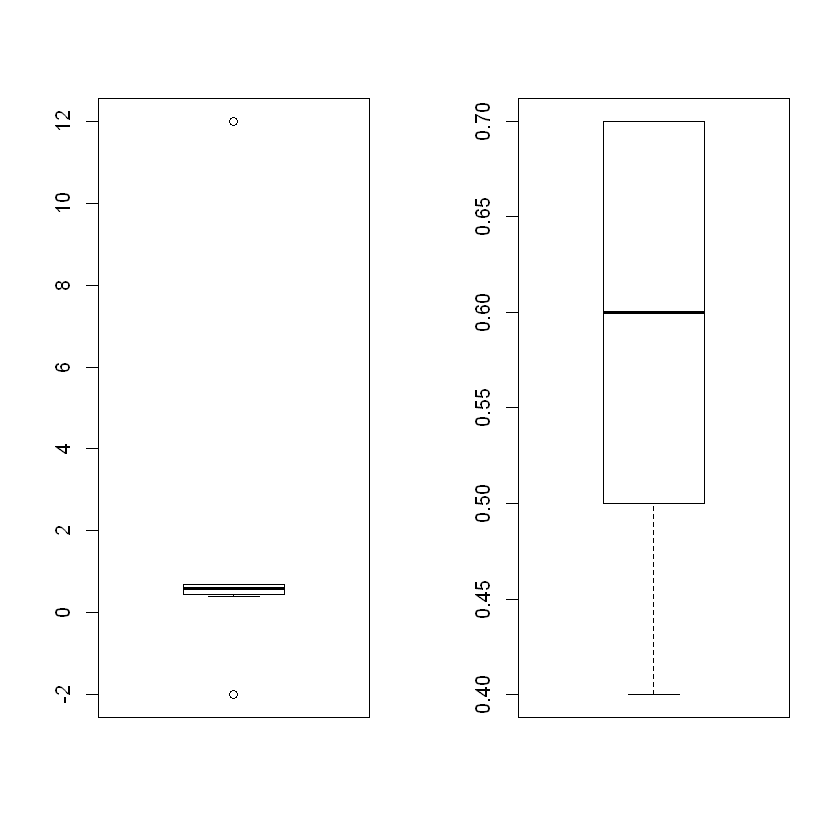

In [11]:
# discover and remove outlier
# Create a function to implement removing outlier for a list of elements
remove_outliers <- function(col, na_rm = TRUE, ...) {
    # Get the quantile statistics
    qnt <- quantile(col, probs=c(.25, .75), na.rm = na_rm, ...)
    print(qnt)
    # Set the removing threshold
    thresh <- 1.5 * IQR(col, na.rm = na_rm)
    col_new <- col
    # Set the elements where its value is out of the threshold
    col_new[col < (qnt[1] - thresh)] <- NA
    col_new[col > (qnt[2] + thresh)] <- NA
    return(col_new)
}
col_new <- remove_outliers(data1$Col4)
# Draw a boxplot to show the result
par(mfrow = c(1, 2))
boxplot(data2$Col4)
boxplot(col_new)

In [12]:
# Visit the site below and use the link to download the library
# https://anaconda.org/conda-forge/r-corrplot
# conda install -c conda-forge r-corrplot

# library("corrplot")
data1[, c("Col3", "Col4", "Col5", "Col6", "Col7", "Label")]
cormat <- cor(data1[, c("Col3", "Col4", "Col5", "Col6", "Col7")])
round(cormat, 2)
# corrplot(cormat, method = "circle", type = "upper")

Col3,Col4,Col5,Col6,Col7,Label
1,0.6,2,-2,1.3,lb1
2,NA,4,-4,2.8,lb2
3,0.4,6,-6,-3.5,lb2
NA,12.0,8,-8,4.4,lb1
5,0.7,10,-10,9.9,lb2
5,0.7,10,-10,9.9,lb2
6,0.5,12,-12,-1.9,lb2
7,-2.0,14,-14,0.0,lb2


,Col3,Col4,Col5,Col6,Col7
Col3,1,NA,NA,NA,NA
Col4,NA,1,NA,NA,NA
Col5,NA,NA,1.0,-1.0,0.1
Col6,NA,NA,-1.0,1.0,-0.1
Col7,NA,NA,0.1,-0.1,1.0


In [13]:
data2

Col1,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
id1,1,0.6,2,-2,1.3,lb1,1,0,0,0
id2,2,NA,4,-4,2.8,lb2,0,1,0,0
id3,3,0.4,6,-6,-3.5,lb2,0,0,1,0
id4,NA,12.0,8,-8,4.4,lb1,1,0,0,0
id5,5,0.7,10,-10,9.9,lb2,0,0,1,0
id5,5,0.7,10,-10,9.9,lb2,0,0,1,0
id6,6,0.5,12,-12,-1.9,lb2,0,0,0,1
id7,7,-2.0,14,-14,0.0,lb2,0,1,0,0


In [14]:
# remove the first ID column
data2[, -1] # method1
data2[, -c(1)] # method2, same result
model_data <- data2[, -1]

Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,0.6,2,-2,1.3,lb1,1,0,0,0
2,NA,4,-4,2.8,lb2,0,1,0,0
3,0.4,6,-6,-3.5,lb2,0,0,1,0
NA,12.0,8,-8,4.4,lb1,1,0,0,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
6,0.5,12,-12,-1.9,lb2,0,0,0,1
7,-2.0,14,-14,0.0,lb2,0,1,0,0


Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,0.6,2,-2,1.3,lb1,1,0,0,0
2,NA,4,-4,2.8,lb2,0,1,0,0
3,0.4,6,-6,-3.5,lb2,0,0,1,0
NA,12.0,8,-8,4.4,lb1,1,0,0,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
6,0.5,12,-12,-1.9,lb2,0,0,0,1
7,-2.0,14,-14,0.0,lb2,0,1,0,0


In [15]:
model_data <- na.omit(model_data)
model_data <- model_data[!duplicated(model_data),]
model_data

,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,1,0.6,2,-2,1.3,lb1,1,0,0,0
3,3,0.4,6,-6,-3.5,lb2,0,0,1,0
5,5,0.7,10,-10,9.9,lb2,0,0,1,0
7,6,0.5,12,-12,-1.9,lb2,0,0,0,1
8,7,-2.0,14,-14,0.0,lb2,0,1,0,0


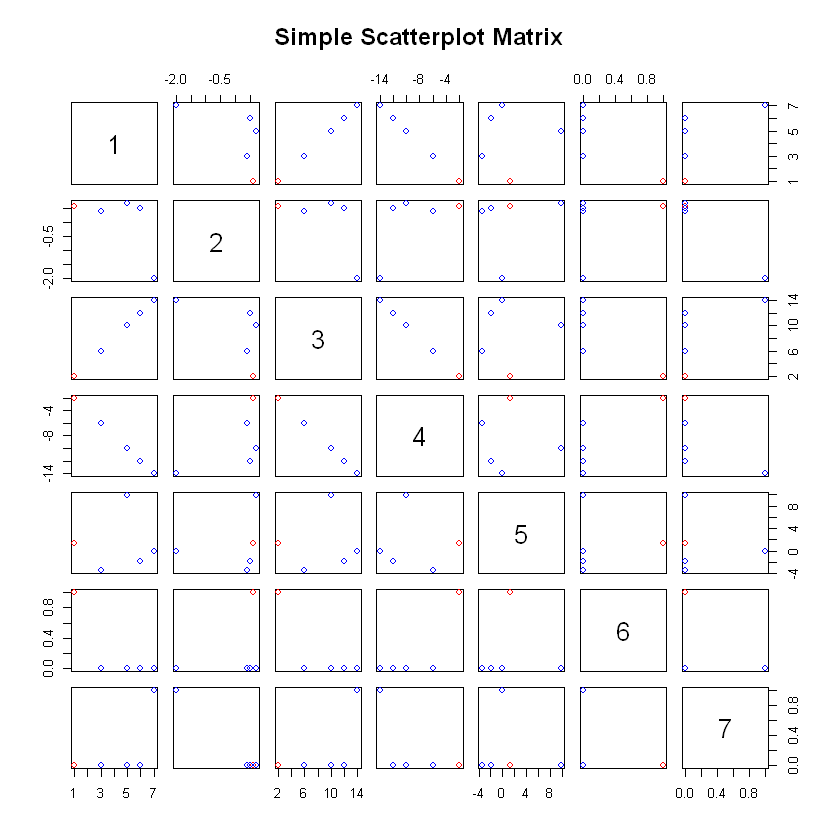

In [16]:
# Convert columns to numeric type
model_data$Col3 <- as.numeric(model_data$Col3)
model_data$Col4 <- as.numeric(model_data$Col4)
model_data$Col5 <- as.numeric(model_data$Col5)
model_data$Col6 <- as.numeric(model_data$Col6)
model_data$Col7 <- as.numeric(model_data$Col7)
model_data$aa <- as.numeric(model_data$aa)
model_data$bb <- as.numeric(model_data$bb)
model_data$cc <- as.numeric(model_data$cc)
model_data$dd <- as.numeric(model_data$dd)

# set group for labels
labels <- NA
labels[model_data$Label=="lb1"] <- 1
labels[model_data$Label=="lb2"] <- 2

# Plot
pairs(~Col3+Col4+Col5+Col6+Col7+aa+bb,data=model_data, 
      main="Simple Scatterplot Matrix", 
      labels=c(1, 2, 3, 4, 5 ,6 , 7),
      col=c("red", "blue")[labels])

In [38]:
model_data
# split dataset
trainset <- model_data[c(3:6),]
testset <- model_data[1:2,]
trainset
testset

# Split dataset
# https://www.r-bloggers.com/2021/05/linear-discriminant-analysis-in-r/
# set.seed(494821)
# ind <- sample(2, nrow(model_data), replace=TRUE, prob=c(0.6, 0.4))
# ind
# trainset <- model_data[ind==1,]
# testset <- model_data[ind==2,]

[1] 1 1 2 2 2 2

,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,1,0.6,2,-2,1.3,lb1,1,0,0,0
3,3,0.4,6,-6,-3.5,lb2,0,0,1,0
4,4,12.0,8,-8,4.4,lb1,1,0,0,0
5,5,0.7,10,-10,9.9,lb2,0,0,1,0
7,6,0.5,12,-12,-1.9,lb2,0,0,0,1
8,7,-2.0,14,-14,0.0,lb2,0,1,0,0


,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
4,4,12.0,8,-8,4.4,lb1,1,0,0,0
5,5,0.7,10,-10,9.9,lb2,0,0,1,0
7,6,0.5,12,-12,-1.9,lb2,0,0,0,1
8,7,-2.0,14,-14,0.0,lb2,0,1,0,0


,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,1,0.6,2,-2,1.3,lb1,1,0,0,0
3,3,0.4,6,-6,-3.5,lb2,0,0,1,0


In [18]:
library("class")

trainX <- trainset[,names(trainset)[names(trainset)!="Label"]]
trainY <- trainset[,names(trainset)[names(trainset)=="Label"]]
testX <- testset[,names(testset)[names(testset)!="Label"]]
testY <- testset[,names(testset)[names(testset)=="Label"]]
res <- knn(trainX, testX, cl=trainY, k=2)
as.character(res)

ERROR: Error in knn(trainX, testX, cl = trainY, k = 2): no missing values are allowed


In [19]:
# Calculte metrics, acc
acc <- 100 * sum(testY == as.character(res))/NROW(testY)
cat("Accuracy is:", acc, "%")

ERROR: Error in eval(expr, envir, enclos): object 'res' not found


In [364]:
# Confusion matrix
confusionMat <- table(as.character(res), testY)
confusionMat

     testY
      lb1 lb2
  lb2   1   1

In [23]:
# read data from a file
data1 <- readr::read_csv("sample.csv")
data1

# Rename columns
data2 <- data.frame(data1[, c("Col1", "Col3", "Col4", "Col5", "Col6", "Col7", "Label")], model.matrix(~Col2-1,data=data1))
names(data2) <- c("Col1", "Col3", "Col4", "Col5", "Col6", "Col7", "Label", "aa", "bb", "cc", "dd")
data2

# remove the first ID column
data2[, -1] # method1
data2[, -c(1)] # method2, same result
model_data <- data2[, -1]

# Remove NA rows
model_data <- na.omit(model_data)
model_data <- model_data[!duplicated(model_data),]
model_data

# split dataset
trainset <- model_data[c(3:6),]
testset <- model_data[1:2,]
trainset
testset

library("class")

trainX <- trainset[,names(trainset)[names(trainset)!="Label"]]
trainY <- trainset[,names(trainset)[names(trainset)=="Label"]]
testX <- testset[,names(testset)[names(testset)!="Label"]]
testY <- testset[,names(testset)[names(testset)=="Label"]]
res <- knn(trainX, testX, cl=trainY, k=2)
as.character(res)

Parsed with column specification:
cols(
  Col1 = col_character(),
  Col2 = col_character(),
  Col3 = col_double(),
  Col4 = col_double(),
  Col5 = col_double(),
  Col6 = col_double(),
  Col7 = col_double(),
  Label = col_character()
)


Col1,Col2,Col3,Col4,Col5,Col6,Col7,Label
id1,aa,1,0.6,2,-2,1.3,lb1
id2,bb,2,NA,4,-4,2.8,lb2
id3,cc,3,0.4,6,-6,-3.5,lb2
id4,aa,4,12.0,8,-8,4.4,lb1
id5,cc,5,0.7,10,-10,9.9,lb2
id5,cc,5,0.7,10,-10,9.9,lb2
id6,dd,6,0.5,12,-12,-1.9,lb2
id7,bb,7,-2.0,14,-14,0.0,lb2


Col1,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
id1,1,0.6,2,-2,1.3,lb1,1,0,0,0
id2,2,NA,4,-4,2.8,lb2,0,1,0,0
id3,3,0.4,6,-6,-3.5,lb2,0,0,1,0
id4,4,12.0,8,-8,4.4,lb1,1,0,0,0
id5,5,0.7,10,-10,9.9,lb2,0,0,1,0
id5,5,0.7,10,-10,9.9,lb2,0,0,1,0
id6,6,0.5,12,-12,-1.9,lb2,0,0,0,1
id7,7,-2.0,14,-14,0.0,lb2,0,1,0,0


Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,0.6,2,-2,1.3,lb1,1,0,0,0
2,NA,4,-4,2.8,lb2,0,1,0,0
3,0.4,6,-6,-3.5,lb2,0,0,1,0
4,12.0,8,-8,4.4,lb1,1,0,0,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
6,0.5,12,-12,-1.9,lb2,0,0,0,1
7,-2.0,14,-14,0.0,lb2,0,1,0,0


Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,0.6,2,-2,1.3,lb1,1,0,0,0
2,NA,4,-4,2.8,lb2,0,1,0,0
3,0.4,6,-6,-3.5,lb2,0,0,1,0
4,12.0,8,-8,4.4,lb1,1,0,0,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
5,0.7,10,-10,9.9,lb2,0,0,1,0
6,0.5,12,-12,-1.9,lb2,0,0,0,1
7,-2.0,14,-14,0.0,lb2,0,1,0,0


,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,1,0.6,2,-2,1.3,lb1,1,0,0,0
3,3,0.4,6,-6,-3.5,lb2,0,0,1,0
4,4,12.0,8,-8,4.4,lb1,1,0,0,0
5,5,0.7,10,-10,9.9,lb2,0,0,1,0
7,6,0.5,12,-12,-1.9,lb2,0,0,0,1
8,7,-2.0,14,-14,0.0,lb2,0,1,0,0


,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
4,4,12.0,8,-8,4.4,lb1,1,0,0,0
5,5,0.7,10,-10,9.9,lb2,0,0,1,0
7,6,0.5,12,-12,-1.9,lb2,0,0,0,1
8,7,-2.0,14,-14,0.0,lb2,0,1,0,0


,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
1,1,0.6,2,-2,1.3,lb1,1,0,0,0
3,3,0.4,6,-6,-3.5,lb2,0,0,1,0


[1] "lb1" "lb2"

In [33]:
library(pROC)
roc(as.numeric(res), as.numeric(testY))

Warning message in roc.default(as.numeric(res), as.numeric(testY)):
"NAs introduced by coercion"

ERROR: Error in roc.default(as.numeric(res), as.numeric(testY)): No control observation.


In [53]:
trainset

,Col3,Col4,Col5,Col6,Col7,Label,aa,bb,cc,dd
4,4,12.0,8,-8,4.4,lb1,1,0,0,0
5,5,0.7,10,-10,9.9,lb2,0,0,1,0
7,6,0.5,12,-12,-1.9,lb2,0,0,0,1
8,7,-2.0,14,-14,0.0,lb2,0,1,0,0


In [51]:
# https://www.r-bloggers.com/2021/05/linear-discriminant-analysis-in-r/
library(MASS)
linear <- lda(Label~., trainset[,c("Col3", "Col4", "Col5", "Label")])
linear

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

Call:
lda(Label ~ ., data = trainset[, c("Col3", "Col4", "Col5", "Label")])

Prior probabilities of groups:
 lb1  lb2 
0.25 0.75 

Group means:
    Col3       Col4 Col5
lb1    4 12.0000000    8
lb2    6 -0.2666667   12

Coefficients of linear discriminants:
            LD1
Col3 -0.9382404
Col4 -1.4918282
Col5 -0.4691202

$class
[1] lb1 lb2 lb2 lb2
Levels: lb1 lb2

$posterior
           lb1          lb2
4 1.000000e+00 3.363102e-46
5 6.733795e-50 1.000000e+00
7 6.282762e-40 1.000000e+00
8 1.233338e-51 1.000000e+00

$x
         LD1
4 -10.910098
5   4.071080
7   2.492964
8   4.346054

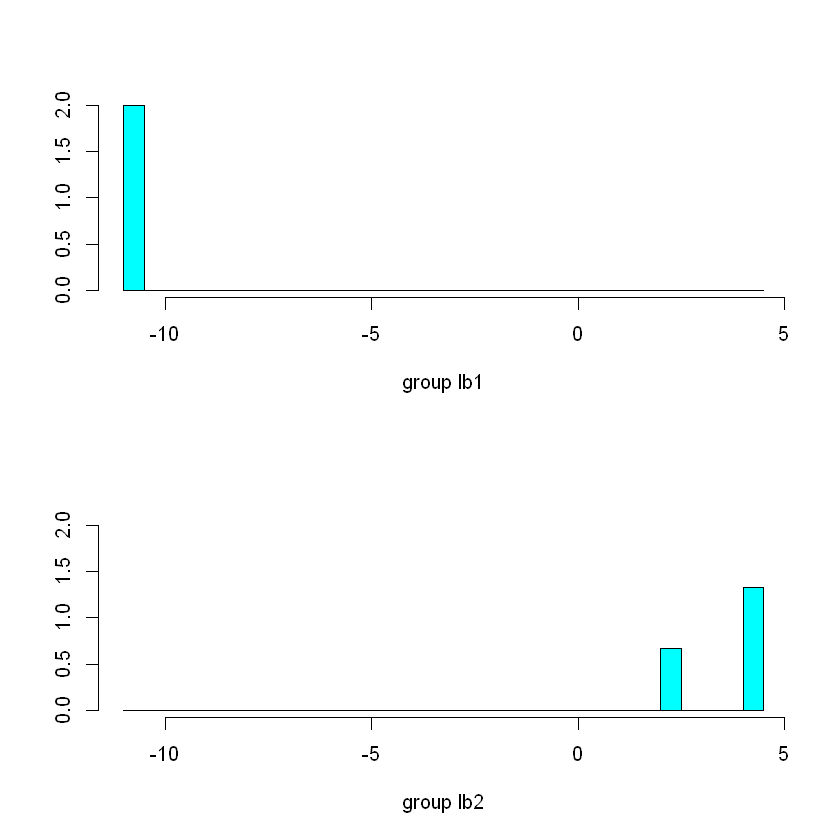

In [56]:
# plot the result
p <- predict(linear, trainset[,c("Col3", "Col4", "Col5", "Label")])
p
ldahist(data=p$x[,1], g=trainset$Label)